# 0. 파일 불러오기

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from google.colab import drive
drive.mount('/content/drive')
PATH = "/content/drive/MyDrive/KUBIG"
df = pd.read_csv(PATH+"/HousingData.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. EDA


### 1.1 자료 내용 확인

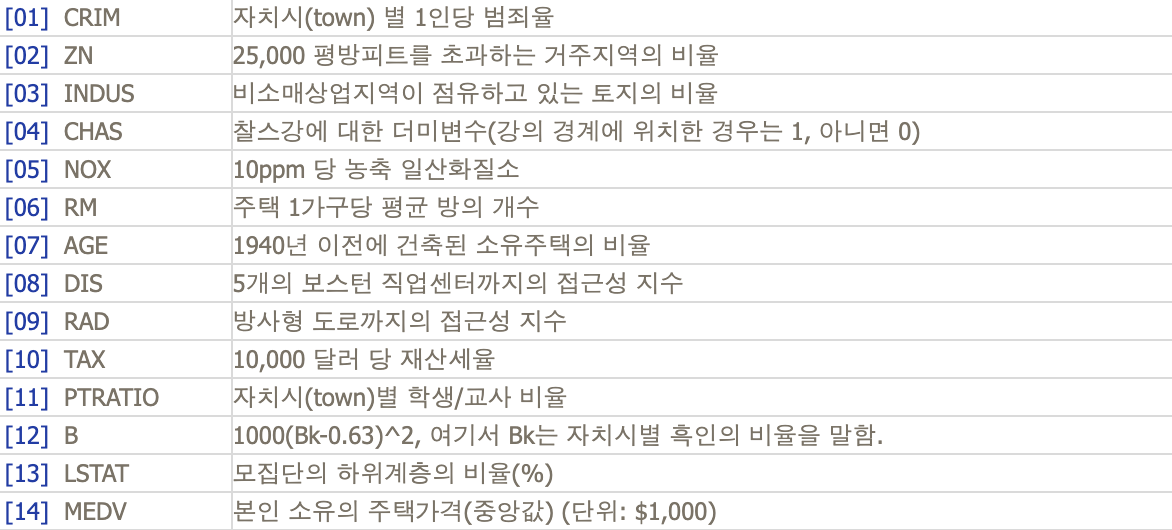

In [65]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [67]:
# 데이터의 개수 : 506
df.shape

(506, 14)

### 1.2 범주형 변수의 처리 

In [97]:
# CHAS가 범주형 변수이므로 가변수화
df = pd.get_dummies(df, columns = ["CHAS"], drop_first=True)

df = df[['CRIM', 'ZN', 'INDUS', "CHAS_1.0", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]]

KeyError: ignored

### 1.3 결측치 처리

In [85]:
df.isnull().sum()

CRIM        20
ZN          20
INDUS       20
CHAS_1.0     0
NOX          0
RM           0
AGE         20
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT       20
MEDV         0
dtype: int64

In [86]:
# 결측치가 하나라도 있는 행을 제거할 경우 데이터의 개수가 506개에서 411개로 감소 (대략 20%)
# 결측치를 보간하는 여러 방법 (분석자의 직관에 의해 중요하다고 생각하는 변수만 보간하고 덜 중요하다고 생각되는 변수는 제거 / 평균이나 중앙값으로 보간 등)이 있으나, 여기선 논의의 편의를 위해 결측치가 하나라도 있는 데이터를 제거한 채 분석 진행.
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 0 to 504
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      411 non-null    float64
 1   ZN        411 non-null    float64
 2   INDUS     411 non-null    float64
 3   CHAS_1.0  411 non-null    uint8  
 4   NOX       411 non-null    float64
 5   RM        411 non-null    float64
 6   AGE       411 non-null    float64
 7   DIS       411 non-null    float64
 8   RAD       411 non-null    int64  
 9   TAX       411 non-null    int64  
 10  PTRATIO   411 non-null    float64
 11  B         411 non-null    float64
 12  LSTAT     411 non-null    float64
 13  MEDV      411 non-null    float64
dtypes: float64(11), int64(2), uint8(1)
memory usage: 45.4 KB


In [98]:
df = df.dropna()

1.4 히스토그램

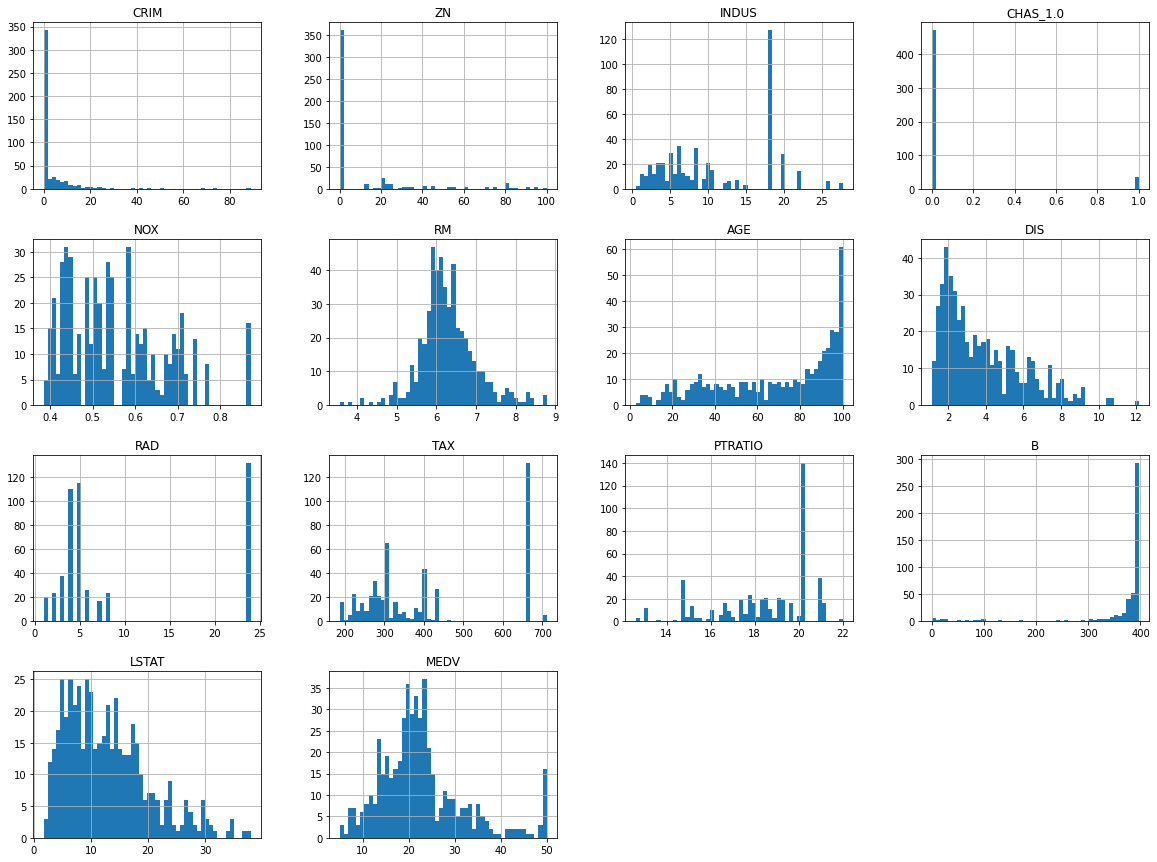

In [87]:
df.hist(bins =50, figsize = (20,15))
plt.show()

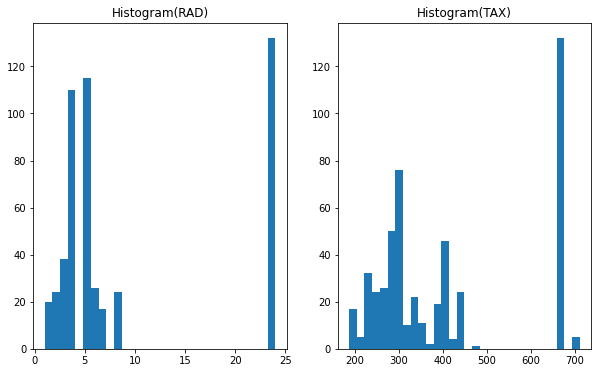

In [88]:
# RAD변수와 TAX변수 : 다소 극단적인 형태 (양 극단에 자료가 몰려있음, 양봉분포)
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df.RAD, bins=30, histtype="bar")
ax[0].set_title("Histogram(RAD)")

ax[1].hist(df.TAX, bins=30, histtype="bar")
ax[1].set_title("Histogram(TAX)")
plt.show()

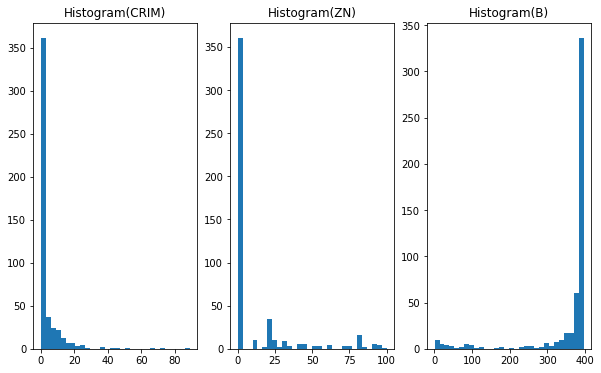

In [89]:
# CRIM, ZN, B : 다소 극단적인 형태 (Skewed)
fig, ax = plt.subplots(1,3, figsize=(10,6))
ax[0].hist(df.CRIM, bins=30, histtype="bar")
ax[0].set_title("Histogram(CRIM)")

ax[1].hist(df.ZN, bins=30, histtype="bar")
ax[1].set_title("Histogram(ZN)")

ax[2].hist(df.B, bins=30, histtype="bar")
ax[2].set_title("Histogram(B)")
plt.show()

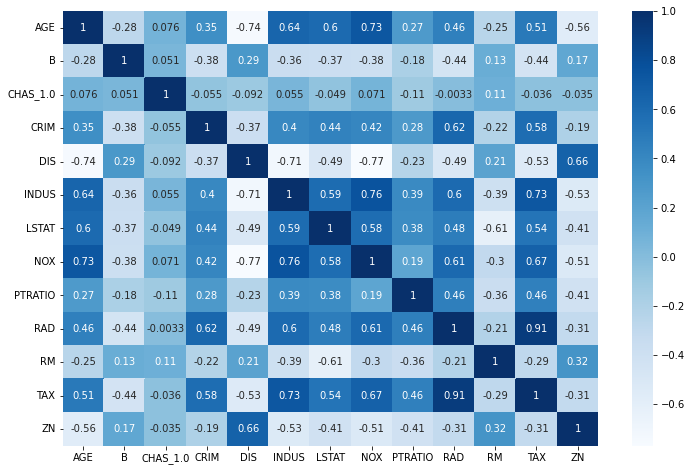

In [90]:
# Target variable 인 MEDV를 제외하고 상관계수 Input Variable 끼리 상관계수 분석
corr = df[df.columns.difference(['MEDV'])].corr()
 
# 상관계수의 절대값이 0.6 이상인 변수들이 다수 존재 (다중공선성의 위험)
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot=True, cmap='Blues')

### 1.4 Dataset 분리

In [136]:
X = df.iloc[:, 0:13].values
y = df.iloc[:, 13].values.reshape(-1,1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 2018)

print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",Y_train.shape)
print("Shape of y_test",Y_test.shape)

Shape of X_train:  (287, 13)
Shape of X_test:  (124, 13)
Shape of y_train:  (287, 1)
Shape of y_test (124, 1)


## 2 Regression


### 2.1 모든 Input Variable을 활용하여 선형회귀

In [107]:
# Condition Number (다중공선성을 나타낼 수 있는 하나의 척도)가 863으로 매우 크게 나타남
# 일반적으로 15가 넘으면 데이터의 공선성이 회귀분석에 안 좋은 결과를 끼치는 것으로 판단할 수 있으며, 30이 넘을 경우 조치가 필요함  
# Note[3] 참조

import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor 
%matplotlib inline


df['intercept'] = 1
lm = sm.OLS(df['MEDV'], df[['CRIM', 'ZN', 'INDUS', "CHAS_1.0", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              778.8
Date:                Wed, 01 Feb 2023   Prob (F-statistic):                   1.28e-273
Time:                        07:12:00   Log-Likelihood:                         -1216.3
No. Observations:                 411   AIC:                                      2459.
Df Residuals:                     398   BIC:                                      2511.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0818      0.034     -2.400      0.017      -0.149      -0.015
ZN             0.0554      0.015      3.705      0.000       0.026       0.085
INDUS         -0.0117      0.069     -0.171      0.864      -0.147       0.123
CHAS_1.0       2.9529      0.975      3.029      0.003       1.036       4.870
NOX           -3.0761      3.594     -0.856      0.393     -10.141       3.989
RM             5.9607      0.333     17.886      0.000       5.306       6.616
AGE           -0.0169      0.015     -1.137      0.256      -0.046       0.012
DIS           -1.0135      0.203     -4.994      0.000      -1.413      -0.614
RAD            0.1577      0.069      2.280      0.023       0.022       0.294
TAX           -0.0104      0.004     -2.507      0.013      -0.018      -0.002
PTRATIO       -0.3662      0.117     -3.131      0.002      -0.596      -0.136
B              0.0143      0.003      4.982      0.000       0.009       0.020
LSTAT         -0.3477      0.053     -6.538      0.000      -0.452      -0.243
==============================================================================
Omnibus:                      171.289   Durbin-Watson:                   1.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1176.328
Skew:                           1.625   Prob(JB):                    3.66e-256
Kurtosis:                      10.624   Cond. No.                     8.63e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [117]:
# VIF 수치
# VIF 수치 또한 10을 넘을 경우 다중공선성이 존재함을 의미

from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = []
reg_coef = []
vif = []
for i in range(len(lm.exog_names)):
    col_name = lm.exog_names[i]
    variables.append(col_name)
    reg_coef.append(lm.fit().params[col_name])
    vif.append(variance_inflation_factor(lm.exog, i))
    
df_res = pd.DataFrame()
df_res['Variable'] = variables
df_res['Estimate'] = reg_coef
df_res['VIF'] = vif

df_res.sort_values(by="VIF", ascending=False)

,Variable,Estimate,VIF
10,PTRATIO,-0.366202,86.991015
5,RM,5.960745,80.763767
4,NOX,-3.076075,75.569015
9,TAX,-0.010354,60.959797
6,AGE,-0.016878,22.352844
11,B,0.014303,20.541750
2,INDUS,-0.011747,14.596759
8,RAD,0.157671,14.541166
7,DIS,-1.013500,14.253231
12,LSTAT,-0.347670,11.180556


**Condition Number와 VIF를 확인하였을 때, 심각한 수준의 다중공선성이 확인된다.**

#### 2.1.1 Train / Test 나눠서 RMSE 도출

In [153]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, Y_train)


from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = Y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(Y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(Y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(Y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.61570341458036
R2_score (train):  0.7376394236736472
R2_score (test):  0.7911749276893901
RMSE:  3.970743509889718


### 2.2 Stepwise Selection을 활용하여 변수 선택 후 선형회귀

In [122]:
import warnings
warnings.filterwarnings('ignore')

## 전진 단계별 선택법
variables = df.columns.difference(['MEDV','intercept']).tolist() ## 설명 변수 리스트
 
y = df['MEDV'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

selected_variables # 선택된 변수 11개

['LSTAT',
 'RM',
 'PTRATIO',
 'CHAS_1.0',
 'B',
 'DIS',
 'NOX',
 'ZN',
 'CRIM',
 'RAD',
 'TAX']

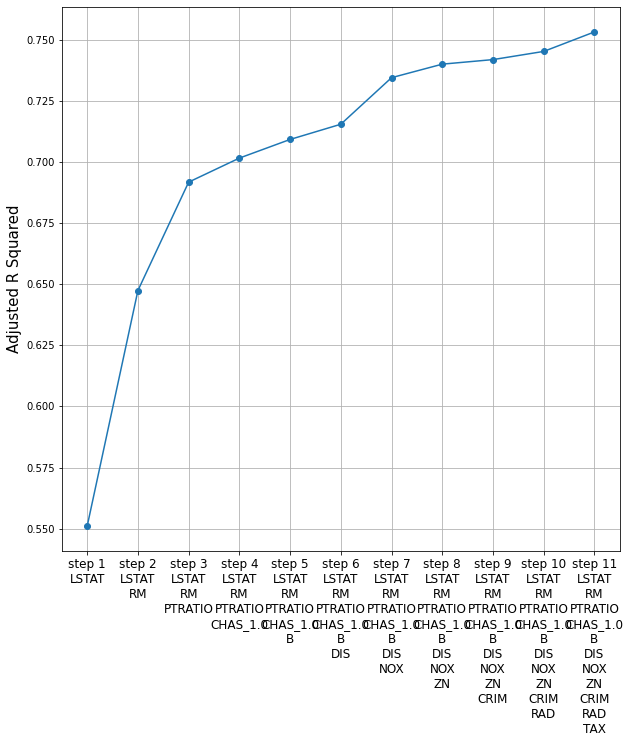

In [81]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [108]:
# Condition Number (다중공선성을 나타낼 수 있는 하나의 척도)가 785으로 매우 크게 나타남
# 일반적으로 15가 넘으면 데이터의 공선성이 회귀분석에 안 좋은 결과를 끼치는 것으로 판단할 수 있으며, 30이 넘을 경우 조치가 필요함  
# Note[3] 참조

lm2 = sm.OLS(df['MEDV'], df[['CRIM', 'ZN', "CHAS_1.0", "NOX", "RM", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]])
results2 = lm2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              921.8
Date:                Wed, 01 Feb 2023   Prob (F-statistic):                   2.70e-276
Time:                        07:23:24   Log-Likelihood:                         -1216.9
No. Observations:                 411   AIC:                                      2456.
Df Residuals:                     400   BIC:                                      2500.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0815      0.034     -2.395      0.017      -0.148      -0.015
ZN             0.0579      0.015      3.943      0.000       0.029       0.087
CHAS_1.0       2.9112      0.970      3.001      0.003       1.004       4.818
NOX           -4.3983      3.291     -1.336      0.182     -10.868       2.072
RM             5.8887      0.318     18.540      0.000       5.264       6.513
DIS           -0.9237      0.184     -5.013      0.000      -1.286      -0.561
RAD            0.1670      0.066      2.536      0.012       0.038       0.296
TAX           -0.0108      0.004     -2.981      0.003      -0.018      -0.004
PTRATIO       -0.3717      0.116     -3.199      0.001      -0.600      -0.143
B              0.0143      0.003      4.976      0.000       0.009       0.020
LSTAT         -0.3677      0.050     -7.329      0.000      -0.466      -0.269
==============================================================================
Omnibus:                      165.171   Durbin-Watson:                   1.141
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1070.711
Skew:                           1.576   Prob(JB):                    3.15e-233
Kurtosis:                      10.252   Cond. No.                     7.85e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
# VIF수치
# VIF 수치 또한 10을 넘을 경우 다중공선성이 존재함을 의미

from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = []
reg_coef = []
vif = []
for i in range(len(lm2.exog_names)):
    col_name = lm2.exog_names[i]
    variables.append(col_name)
    reg_coef.append(lm2.fit().params[col_name])
    vif.append(variance_inflation_factor(lm2.exog, i))
    
df_res = pd.DataFrame()
df_res['Variable'] = variables
df_res['Estimate'] = reg_coef
df_res['VIF'] = vif

df_res.sort_values(by="VIF", ascending=False)

,Variable,Estimate,VIF
8,PTRATIO,-0.371679,86.004055
4,RM,5.888720,73.478172
3,NOX,-4.398286,63.483490
7,TAX,-0.010836,47.302124
9,B,0.014256,20.493305
6,RAD,0.166997,13.210633
5,DIS,-0.923667,11.765118
10,LSTAT,-0.367678,9.966971
1,ZN,0.057924,2.739012
0,CRIM,-0.081523,2.040978


**Stepwise Feature Selection 으로도 다중공선성을 해결하지 못하였음.**

### 2.3 Lasso 이용 (alpha = 0.1)



In [171]:
# 규제 강도 설정
alpha = 0.1

# 라소 모형 구축
lasso = Lasso(alpha= alpha, max_iter = 10000).fit(X_train, Y_train)

# 회귀계수가 0이 아닌 것을 True, False로 분류한 값을 원래 feature name에 넣으면 feature list 출력
feature_list = lasso.coef_
feature_list

array([-0.06508241,  0.06639328,  0.00391622,  2.68015202, -0.        ,
        3.13761087, -0.00787839, -1.22497502,  0.28483747, -0.01833216,
       -0.69696487,  0.00690371, -0.60180272])

In [165]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.15, fit_intercept=True, max_iter=3000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, Y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Lasso(alpha=0.15, max_iter=3000))])

#### 2.3.1 Train / Test 나눠서 RMSE 도출

In [166]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = X_train, y = Y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_pipe.predict(X_train)
r2_score_lasso_train = r2_score(Y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(X_test)
r2_score_lasso_test = r2_score(Y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(mean_squared_error(Y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

CV:  0.7686853035658215
R2_score (train):  0.8876806679868681
R2_score (test):  0.8517693830897073
RMSE:  3.3454109380694197
